In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

https://datadoctorblog.com/data/iris.csv

In [10]:
df = pd.read_csv("iris.csv")
df.head(2)

SepalLength  SepalWidth  PetalLength  Petal.Width Species
0          5.1         3.5          1.4          0.2  setosa
1          4.9         3.0          1.4          0.2  setosa

In [11]:
df.shape

(150, 5)

In [12]:
df["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
X = df.loc[:, :"Petal.Width"]
model = KMeans(n_clusters = 3, random_state = 123)
model.fit(X)
df_centroids = pd.DataFrame(model.cluster_centers_, 
                            columns = X.columns)

In [16]:
df_centroids["cluster"] = [1, 2, 3]
df_centroids

SepalLength  SepalWidth  PetalLength  Petal.Width  cluster
0     6.850000    3.073684     5.742105     2.071053        1
1     5.006000    3.428000     1.462000     0.246000        2
2     5.901613    2.748387     4.393548     1.433871        3

In [ ]:
df.plot.scatter(x = "PetalLength", y = "Petal.Width")

In [28]:
df["cluster"] = model.labels_

In [32]:
df.head(2)

SepalLength  SepalWidth  PetalLength  Petal.Width Species  cluster
0          5.1         3.5          1.4          0.2  setosa        1
1          4.9         3.0          1.4          0.2  setosa        1

In [30]:
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1   2
Species               
setosa       0  50   0
versicolor   2   0  48
virginica   36   0  14

In [31]:
df["cluster"].value_counts() # 각 군집의 크기.

cluster
2    62
1    50
0    38
Name: count, dtype: int64

In [34]:
df.drop(columns = "Species").groupby("cluster").mean().reset_index()

cluster  SepalLength  SepalWidth  PetalLength  Petal.Width
0        0     6.850000    3.073684     5.742105     2.071053
1        1     5.006000    3.428000     1.462000     0.246000
2        2     5.901613    2.748387     4.393548     1.433871

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='PetalLength', ylabel='Petal.Width'>

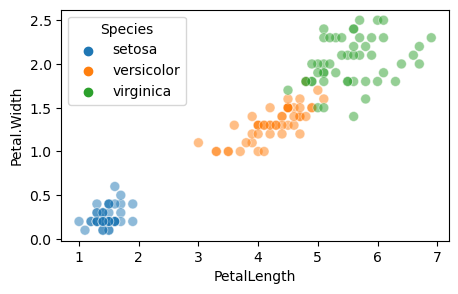

In [48]:
plt.figure(figsize = (5, 3))
sns.scatterplot(data = df, x = "PetalLength", y = "Petal.Width",
                hue = "Species", s = 50, alpha = 0.5)

In [49]:
df_dia = pd.read_csv("data_diamonds.csv")
df_dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [ ]:
model_KMeans1 = KMeans(n_clusters = 4, random_state = 123)
model_KMeans1.fit(df_dia[["price"]])
df_dia["cluster"] = model_KMeans1.labels_

In [53]:
df_dia.groupby("cluster")[["price", "carat"]].mean().reset_index()

cluster         price     carat
0        0   4688.402766  1.015188
1        1  15047.901726  1.863551
2        2   1296.704152  0.462498
3        3   9079.373534  1.366314

<Axes: xlabel='carat', ylabel='price'>

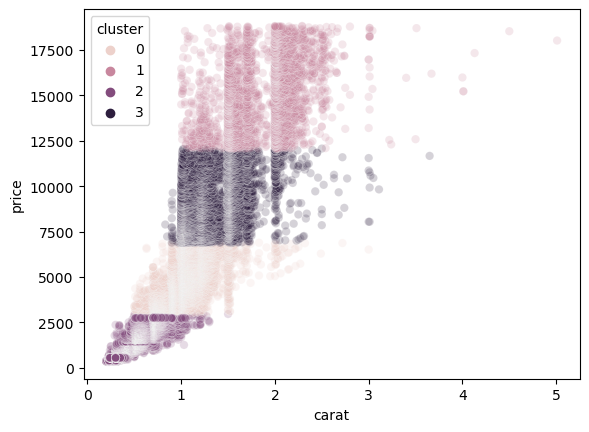

In [57]:
sns.scatterplot(data = df_dia, x = "carat", y = "price",
                alpha = 0.2, hue = "cluster")

In [58]:
df_dia.loc[df_dia["cluster"] == 0, "color"].value_counts(normalize = True)

color
H    0.194680
G    0.184095
F    0.167231
E    0.154671
D    0.119814
I    0.111911
J    0.067598
Name: proportion, dtype: float64

In [59]:
df_e = pd.read_csv("data_elec_load.csv")
df_e.head(2)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   
1  2008      1    2  37425  35239  33568  32171  31616  31725  32575  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  28147  28313  28683  30921  32879  33038  34031  34684  37444  38160  
1  38213  38132  38399  39796  40810  39980  40084  39630  42008  42150  

[2 rows x 27 columns]

In [60]:
df_e_hr = df_e.loc[:, "X1HR":"X24HR"].copy()

In [63]:
df_e_day = df_e.loc[:, :"DAY"].copy()
df_e_day["min"] = df_e_hr.min(axis = 1)
df_e_day["max"] = df_e_hr.max(axis = 1)
df_e_day["std"] = df_e_hr.std(axis = 1)
df_e_day["avg"] = df_e_hr.mean(axis = 1)
df_e_day["range"] = df_e_day["max"] - df_e_day["min"]

In [64]:
df_e_day.head(2)

YEAR  MONTH  DAY    min    max          std           avg  range
0  2008      1    1  27869  39638  3725.575117  32142.041667  11769
1  2008      1    2  31616  42150  3211.846827  37228.958333  10534

In [75]:
df_e_day["min"].mean()

41966.403271291594

In [74]:
df_e_day["std"].mean()

4122.986452890173

In [65]:
from sklearn.preprocessing import StandardScaler

In [70]:
arr_e_day_nor = StandardScaler().fit_transform(df_e_day.loc[:, "min":])
df_e_day_nor = pd.DataFrame(arr_e_day_nor, columns = df_e_day.columns[3:])
df_e_day_nor.head(2)

min       max       std       avg     range
0 -1.914528 -1.663188 -0.213177 -2.085624 -0.066010
1 -1.405659 -1.372961 -0.488749 -1.449268 -0.339629

In [69]:
model_KMeans2 = KMeans(n_clusters = 5, random_state = 123)
model_KMeans2.fit(df_e_day_nor)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=123)

In [71]:
df_e_day["cluster"] = model_KMeans2.labels_

In [72]:
df_e_day.head(2)

YEAR  MONTH  DAY    min    max          std           avg  range  cluster
0  2008      1    1  27869  39638  3725.575117  32142.041667  11769        4
1  2008      1    2  31616  42150  3211.846827  37228.958333  10534        4

In [73]:
df_e_day["cluster"].value_counts()

cluster
1    908
4    854
2    652
3    645
0    487
Name: count, dtype: int64

In [76]:
from sklearn.cluster import DBSCAN

In [92]:
model_DBSCAN = DBSCAN(eps = 0.3)
model_DBSCAN.fit(df_e_day_nor)
ser_label = pd.Series(model_DBSCAN.labels_)
ser_label.value_counts()

 1    3457
-1      68
 2      12
 0       5
 3       4
Name: count, dtype: int64

In [ ]:
df_e_day["cluster_DB"] = ser_label
df_e_day.head(2)

In [95]:
df_e_day.loc[df_e_day["cluster_DB"] == -1, ]

YEAR  MONTH  DAY    min    max           std           avg  range  \
21    2008      1   22  23769  36390   4444.527695  28983.500000  12621   
22    2008      1   23  25658  36717   3693.124293  30011.500000  11059   
122   2008      5    2  27984  36389   2582.772283  30753.833333   8405   
207   2008      7   26  28713  48756   7892.798396  41064.208333  20043   
221   2008      8    9  29729  49819   7823.502346  41831.500000  20090   
...    ...    ...  ...    ...    ...           ...           ...    ...   
3483  2017      7   15  44521  71101  10235.064658  60579.958333  26580   
3490  2017      7   22  45055  71648  10151.510721  61052.208333  26593   
3507  2017      8    8  49658  73819   9194.249962  64060.250000  24161   
3511  2017      8   12  46899  73302  10486.494738  63358.375000  26403   
3518  2017      8   19  46765  74015  10772.994108  63599.041667  27250   

      cluster  cluster_DB  
21          4          -1  
22          4          -1  
122         4          -1  
207         2          -1  
221         2          -1  
...       ...         ...  
3483        0          -1  
3490        0          -1  
3507        0          -1  
3511        0          -1  
3518        0          -1  

[68 rows x 10 columns]